<a href="https://colab.research.google.com/github/HimanshuTirole-22/Machine-Learning/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


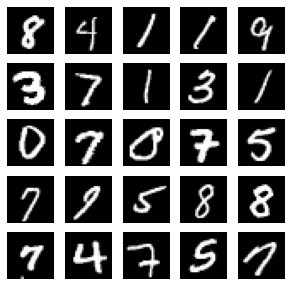

In [3]:
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
X_train.shape

(60000, 784)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

In [9]:
model.add(Dense(32, input_dim = 28 * 28, activation= 'relu')) #input  layer
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))
model.layers


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
model.fit(X_train, y_train, batch_size=32, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3299 - accuracy: 0.9050
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1596 - accuracy: 0.9530
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1220 - accuracy: 0.9631
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1001 - accuracy: 0.9698
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9735


In [12]:
scores = model.evaluate(X_test,y_test)
print('Accuracy : ',scores[1]*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9640
Accuracy :  96.39999866485596


In [13]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 868us/step
[[7.21629476e-04 3.91660404e-04 1.84213281e-01 ... 9.99641776e-01
  2.16614291e-01 1.58238724e-01]
 [1.31976465e-02 7.07019642e-02 9.99977827e-01 ... 2.92314530e-06
  1.51035547e-01 1.65419777e-07]
 [2.07811571e-03 9.99477744e-01 3.29034358e-01 ... 2.67709404e-01
  2.24576786e-01 8.05483665e-03]
 ...
 [2.34491336e-06 7.76234956e-04 3.27159323e-05 ... 7.69398063e-02
  3.02993119e-01 9.76291239e-01]
 [8.38523119e-05 1.01422193e-02 9.38576879e-04 ... 2.82854754e-02
  9.87124145e-01 2.73335096e-03]
 [5.01233101e-01 4.31476219e-04 7.80735984e-02 ... 1.69537689e-05
  3.08500435e-02 2.26450874e-03]]
[7 2 1 ... 4 5 6]


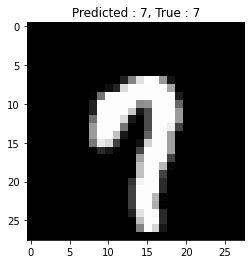

In [15]:
random_idx = np.random.choice(len(X_test))
x_sample = X_test[random_idx]
y_true = np.argmax(y_test,axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title('Predicted : {}, True : {}'.format(y_sample_pred_class,y_sample_true))
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

Text(0.5, 1.0, 'Confusion Matrix')

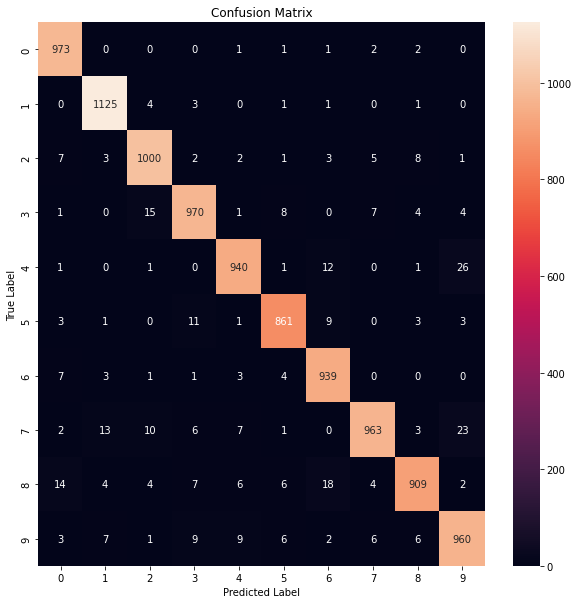

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

313/313 [==============================] - 0s 827us/step


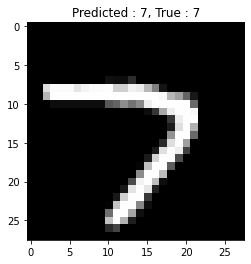

In [17]:
model.save('save.h5')
newmodel = keras.models.load_model('save.h5')
newmodel.predict(X_test)

random_idx = np.random.choice(len(X_test))
x_sample = X_test[random_idx]
y_true = np.argmax(y_test,axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title('Predicted : {}, True : {}'.format(y_sample_pred_class,y_sample_true))
plt.imshow(x_sample.reshape(28, 28), cmap='gray')